# PRACTICA 2: Com realitzar la neteja i l'anàlisi de les dades?

## 0. Càrrega de llibreries

A la cel·la següent es carreguen totes les llibreries necessàries per a l'execució de l'activitat.

In [1]:
# Llibreries bàsiques
import numpy as np
import pandas as pd
import seaborn as sns
import pingouin as pg
import matplotlib.pyplot as plt
from scipy.stats import chisquare
from scipy.stats.contingency import expected_freq
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.tree import export_text



pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

## 1. Descripció del dataset.

### Perquè és important i quina pregunta/problema pretén respondre?

El dataset escollit és el que proposa la pràctica 2, “Heart Attack Analysis & Prediction dataset” ubicat a kaggle https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset.

Aquest, conté informació relacionada amb mesures cardiovasculars de pacients que han patit o no, atacs de cor. La variable objectiu és si té probabilitat d’atac cardiac o no. Aquest dataset ens pot servir per fer un model predictiu per nous casos de pacients però també per estudiar quins son els factors que més afecten, així com realitzar comparacions de grups poblacionals com ara home/dona o per edat. **En aquesta pràctica, analitzarem dues preguntes, quins factors determinen una probabilitat més alta de patir malalties del cor i la creació d'un model de classificació.**

+ **age:** Edat del pacient, numèrica discreta
+ **sex:** Sexe del pacient, categòrica dicotòmica
    + **Valor 0:** Dona
    + **Valor 1:** Home
+ **cp:** tipus de dolor de pit, categòrica nominal amb 4 nivells 
    + **Valor 1:** angina típica
    + **Valor 2:** angina atípica
    + **Valor 3:** dolor no anginós
    + **Valor 4:** asimptomàtic
+ **trtbps:** pressió arterial en repòs (en mm Hg), numèrica continua
+ **chol:** colesterol en mg/dl obtingut mitjançant el sensor IMC, numèrica continua
+ **fbs:** (sucre en sang en dejú > 120 mg/dl), categòrica dicotòmica
    + **Valor 0:** No
    + **Valor 1:** Si
+ **restecg:** resultats electrocardiogràfics en repòs, categòrica 3 nivells
    + **Valor 0:** normal
    + **Valor 1:** amb anormalitat de l'ona ST-T (inversions de l'ona T i/o elevació o depressió ST > 0,05 mV)
    + **Valor 2:** mostra una hipertròfia ventricular esquerra probable o definitiva segons els criteris d'Estes
+ **thalachh:** freqüència cardíaca màxima aconseguida, numèrica continua
+ **exng:** angina induïda per l'exercici, categòrica dicotòmica
    + **Valor 0:** No
    + **Valor 1:** Si
+ **oldpeak:** depressió del ST induïda per l'exercici en relació amb el repòs, numèrica contínua
+ **slp:** el pendent del segment ST de l'exercici màxim
    + **Valor 0:** ascendent
    + **Valor 1:** pla
    + **Valor 2:** descendent 
+ **caa:** nombre de vasos sanguinis principals, numèrica discreta de 0 a 3
+ **thall:** talassèmia, categòrica nominal
    + **Valor 0:** nul
    + **Valor 1:** defecte fixat
    + **Valor 2:** normal
    + **Valor 3:** defecte reversible
+ **objectiu:** diagnòstic de malalties del cor (estat de malaltia angiogràfica), categòrica dicotòmica
    + **Valor 0:** <50% d'estrenyiment del diàmetre, llavors menys possibilitats de patir malalties del cor
    + **Valor 1:** >50% d'estrenyiment de diàmetre, llavors més possibilitats de patir malalties del cor

In [2]:
# carreguem el dataset i visualitzem
malcor = pd.read_csv('heart.csv')
malcor.info()
print(F"\nEl dataset  'heart' conte {malcor.shape[1]} atributs de {malcor.shape[0]} pacients")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB

El dataset  'heart' conte 14 atributs de 303 pacients


In [3]:
malcor.head(10)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [4]:
malcor.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Observem com totes les categoriques (com ja hem explicat a la descripció dels atributs i els seus nivells) ja estan codificades. L'edat dels pacients, com era d'esperar és basicament majors de 50 anys però sorprèn que el màxim sigui 77 anys, no servirà aquest anàlisis per identificar problemes del cor en edats avançades (majors de 80 anys). La variable *chol* colesterol te un valor màxim sospitós, en l'apartata de neteja estudiarem el cas, igual amb oldpeak te un valor màxim outlier.

En quant a valors nulls veiem que les dades estan completes i que no hi ha inconsistències (categories mal descrites, comes enlloc de punts com a separadors, etc.). A continuació anem a veure com es distribueixen les variables.

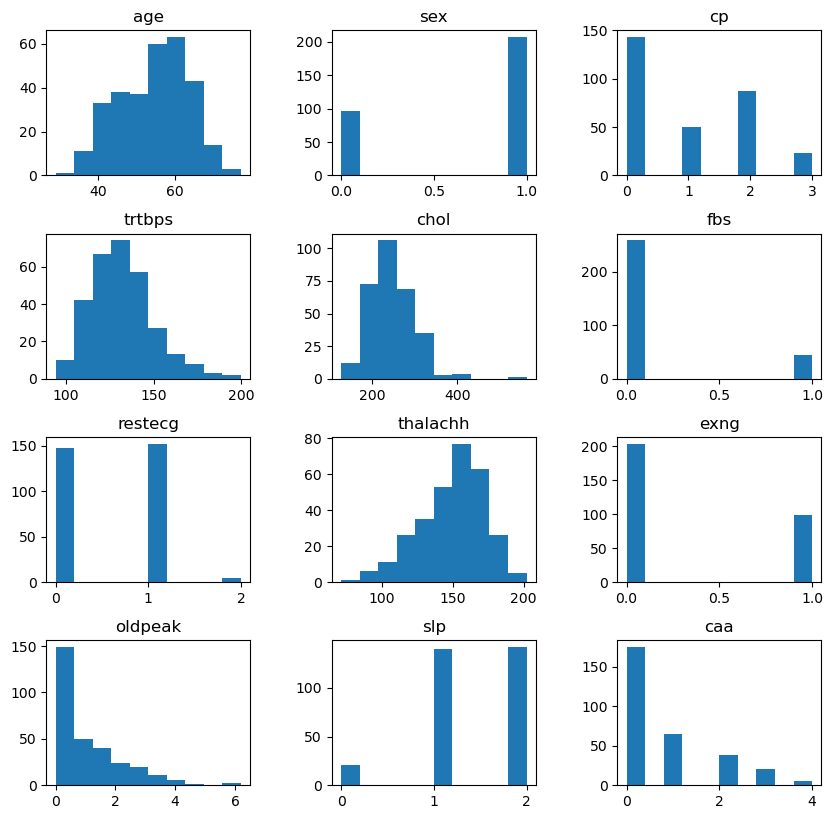

In [5]:
fig = plt.figure(figsize=(10,10), dpi=100)
fig.subplots_adjust(hspace=0.4, wspace=0.4)
plt.rcParams.update({'font.size': 10})

vars = ["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh", "exng", "oldpeak", "slp","caa"]
for i in range(0, 12):
    ax = fig.add_subplot(4, 3, i+1)
    ax.hist(malcor[vars[i]])
    ax.set_title(vars[i])


Si ens fixem amb les distribucions de les variables continues (age, chol, trtbps, thalachh, oldpeak), podem veure que la única que sembla seguir una distribució normal és la variable colesterol, tot i que li observem alguns outliers. Les variables trtbps i thalachh tenen certa tendència cap a l'esquerra i a la dreta respectivament. La variable edad mostra un doble pic en el mostreig, sobre els 50 i 60 anys. Finalment, la variable oldpeak té un comportament decreixent. La forma d'aquestes distribucions ens limitarà els tests i aplicacions que podem fer amb cada una de les variables.

## 2. Integració i selecció de les dades d’interès a analitzar.

Tenim un dataset petit, a priori tots els atributs semblen pertinents per analitzar la possible tendencia a patir malalties del cor, ens faltaria més coneixement mèdic per decidir sobre una subselecció sense analitzar les correlacions. Totes les categòriques ja han estat codificades previament. Amb l'objectiu d'observar diferències entre sexe i per edats, discretitzem la variable edat. 

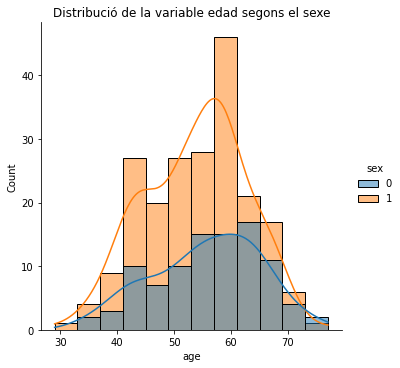

In [6]:
sns.displot(data=malcor, kde=True, x='age',hue='sex')
plt.title('Distribució de la variable edad segons el sexe')
plt.show()

Observem que l'edat no te distribució uniforme i que es distribueix diferent per sexe, discretitzem en tres nivells(bins) com jove, adult, vell. Hi ha mes homes que dones en totes les franges menys en la última que hi ha més dones. Hem escollit la discretització segons: jove < 45, adult entre 45 i 60 i vell a partir dels 60. Ens ha semblat que era una bona forma de dividir ja que correspon a ull als pics que d'edat que s'observen.

In [7]:
for i,edat in enumerate(malcor['age']):
    if edat<=45:
        malcor.loc[i,'edat'] = 'jove'
    if 45<edat<=60:
        malcor.loc[i,'edat'] = 'adult'
    if edat>60:
        malcor.loc[i,'edat'] = 'vell'

Creem dues taules de contingència, una per l'edat i l'altre pel sexe ambdues amb la variable objectiu per posteriorment en l'anàlisis realitzar un test chi quadrat d'indepenència

In [8]:
for i,sexe in enumerate(malcor['sex']):
    if sexe==0:
        malcor.loc[i,'sexe'] = 'dona'
    else:
        malcor.loc[i,'sexe'] = 'home'
for i,diagnostic in enumerate(malcor['output']):
    if diagnostic==0:
        malcor.loc[i, 'diagnòstic'] = 'favorable'
    else:
        malcor.loc[i, 'diagnòstic'] = 'desfavorable'    

In [9]:
edat_obs = pd.crosstab(malcor['diagnòstic'],malcor['edat'])
sexe_obs = pd.crosstab(malcor['diagnòstic'],malcor['sexe'])

# 3. Neteja de les dades
## 3.1 Les dades contenen zeros o valors buits

Ja hem vist que les dades no contenen valors buits amb *info*, i amb *describe* observem zeros amb les variables categoriques, fet normal, el que estudiarem és la variable **oldpeak** que és continua i conté molts 0.

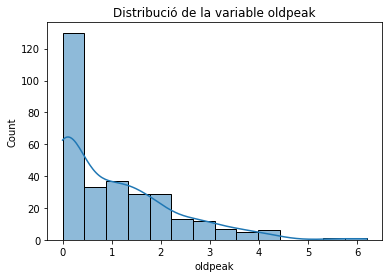

In [10]:
sns.histplot(data=malcor, kde=True, x='oldpeak')
plt.title('Distribució de la variable oldpeak')
plt.show()

Pel que hem estat mirant sobre el significat mèdic de la variable. Quan es realiza un electrocardiograma, hi ha un segment que anomenen ST. Una bona senyal pel funcionament del cor és tenir aquest segment pla en repòs. Si aquesta variable avalua el canvi en aquest segment quan fem exercici i passem a estar en repòs, aleshores entenem que 0 vol dir que el cor funciona bé ja que no pateix quan se'l sotmet a un estres (fer exercici).

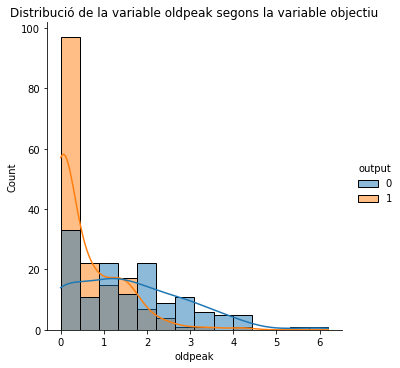

In [11]:
sns.displot(data=malcor,kde=True, x='oldpeak',hue='output')
plt.title('Distribució de la variable oldpeak segons la variable objectiu')
plt.show()

Com ja deiem, observem com valors propers a 0 de *oldpeak* es relacionen amb no patir malalties del cor. En aquest cas els 0 tenen sentit.

## 3.2 Identifica i gestiona els valors extrems.

Ja hem vist com la variable *chol* tenia un valor màxim molt desviat, estudiem aquesta variable.

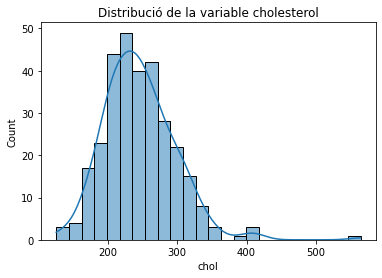

In [12]:
sns.histplot(data=malcor, kde=True, x='chol')
plt.title('Distribució de la variable cholesterol')
plt.show()

Mirant l'histograma es veu clar que tenim valors extrems, el que trobem per sobre de 500 te pinta de ser un valor abnomal, sense sentit. Mirant informació, aquests valors fan referència a persones amb alteracions genetiques molt greus. Els altres casos al voltant de 400 son casos de hipercolesterolemia familiar (una alteració genetica que pateix 1 de cada 500 individus). Mirem els altres atributs d'aquests casos:

In [13]:
malcor[malcor['chol']>370]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output,edat,sexe,diagnòstic
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1,vell,dona,desfavorable
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1,vell,dona,desfavorable
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1,vell,dona,desfavorable
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0,vell,dona,favorable
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0,adult,dona,favorable


L'individu amb 564 de colesterol és un pacient de 67 anys i surt amb un *output* de 1, segur que té probabiliats de patir una malaltia del cor amb aquests nivells de colesterol. L'individu 220 i 246 deuen ser errors ja que surt amb *output* 0, en tot cas treiem tots aquests individus de l'anàlisis per patir mutacions estranyes, aquest tipus de pacients no son el objectiu de l'estudi.

D'aquesta forma ens assegurarem que podem aplicar tests d'hipòtesis i de contrast de mitjanes amb aquesta variable. Per fer això, ens quedarem amb les dades compreses entre mitja mes/menys 3 cops la desviació estàndard.

Int64Index([], dtype='int64')
Int64Index([28, 85, 220, 246], dtype='int64')


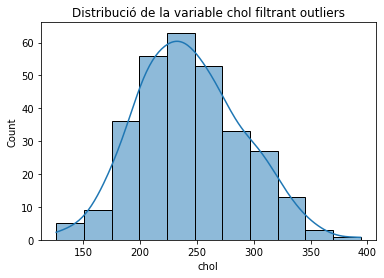

In [14]:
mean = np.mean(malcor['chol'], axis=0)
sd = np.std(malcor['chol'], axis=0)

ind = malcor[malcor['chol'] < mean - 3 * sd].index
malcor.drop(ind, axis=0, inplace=True)
print(ind)
ind=malcor[malcor['chol'] > mean + 3 * sd].index
malcor.drop(ind, axis=0, inplace=True)
print(ind)

sns.histplot(data=malcor, kde=True, x='chol', bins=11)
plt.title('Distribució de la variable chol filtrant outliers')
plt.show()

Les categòriques no tenien nivells diferents dels descrits, mirem un boxplot de les altres continues per no deixar-nos cap outlier sense analitzar.

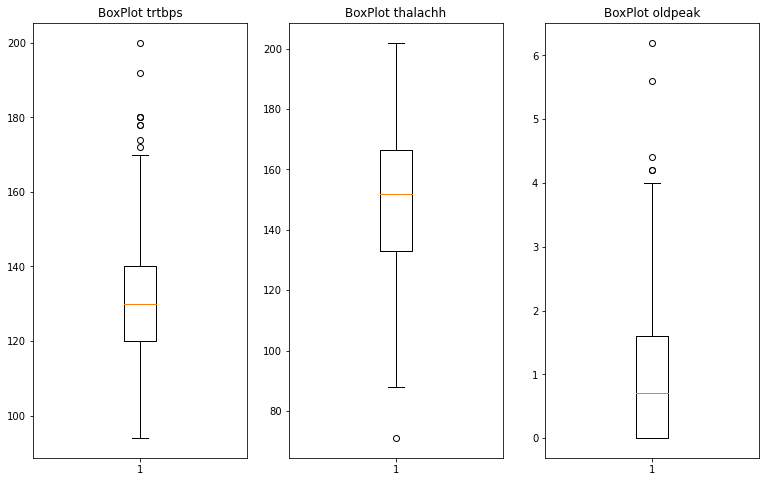

In [15]:
fig, ax = plt.subplots(1,3,figsize=(13,8))
cont = ['trtbps', 'thalachh', 'oldpeak']
for i,variable in enumerate(cont):
    ax[i].boxplot(data=malcor, x=variable)
    ax[i].set_title(F"BoxPlot {variable}")
    
plt.show()

Si mirem la variable trtbps veiem que també segueix una distribució bastant normal. Anem a treure els outliers igual que hem fet amb la variable chol per poder aplicar tests sobre aquestes. En aquest cas també, filtrem per 3 cops la desviació estandard.

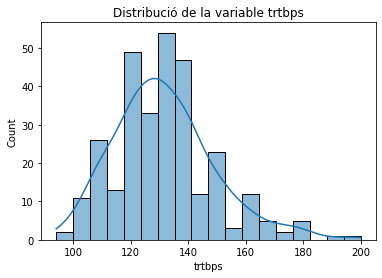

In [16]:
sns.histplot(data=malcor, kde=True, x='trtbps')
plt.title('Distribució de la variable trtbps')
plt.show()

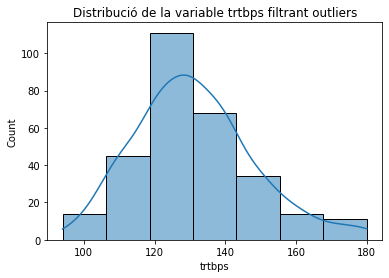

In [17]:
mean = np.mean(malcor['trtbps'], axis=0)
sd = np.std(malcor['trtbps'], axis=0)

ind = malcor[malcor['trtbps'] < mean - 3 * sd].index
malcor.drop(ind, axis=0, inplace=True)
ind=malcor[malcor['trtbps'] > mean + 3 * sd].index
malcor.drop(ind, axis=0, inplace=True)

sns.histplot(data=malcor, kde=True, x='trtbps', bins=7)
plt.title('Distribució de la variable trtbps filtrant outliers')
plt.show()

La variable thalachh mostrava un outlier en el boxplot, però si mirem l'histograma no veiem que hi hagi un valor sense sentit, pel que hem decidit deixar-la tal i com està.

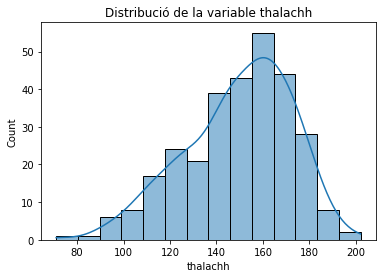

In [18]:
sns.histplot(data=malcor, kde=True, x='thalachh')
plt.title('Distribució de la variable thalachh')
plt.show()

Finalment, tenim la variable oldpeak. En aquest cas la seva distribució és molt decreixent, cosa que fa que el seu punt mig quedi molt desplaçat cap a l'esquerra i el boxplot detecti com a outliers la cua de la distribució. Per aquesta variable també hem decidit deixar-la tal i com estava.

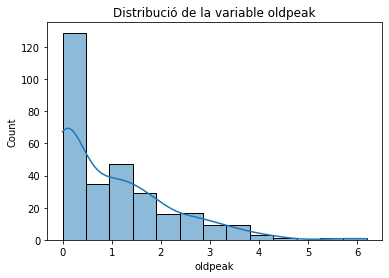

In [19]:
sns.histplot(data=malcor, kde=True, x='oldpeak')
plt.title('Distribució de la variable oldpeak')
plt.show()

In [20]:
# Guardem el dataset net
malcor.to_csv('heart_clean.csv')

# 4. Anàlisi de les dades

## 4.1 Selecció de grups de dades per analitzar/comparar


El primer que volem mirar és si l'edat és un factor de risc per patir malalties de cor, en concret si te una relació positiva, és a dir, si un augment en l'edat implica més risc. Hem discretitzat l'edat i l'output és dicotòmica, així que farem un contrast d'hipotesis per veure la dependencia\independència d'aquestes variables. Mostrem tambè un gràfic, la taula de frequències observades i esperades.

	 taula observada edat

 edat          adult  jove  vell
diagnòstic                     
desfavorable     82    48    35
favorable        78    16    44


	 taula esperada edat

 edat              adult       jove       vell
diagnòstic                                   
desfavorable  87.128713  34.851485  43.019802
favorable     72.871287  29.148515  35.980198

El valor del estadístic de contrast chi-quadrat és 63.91

El p-valor és 1.89e-12


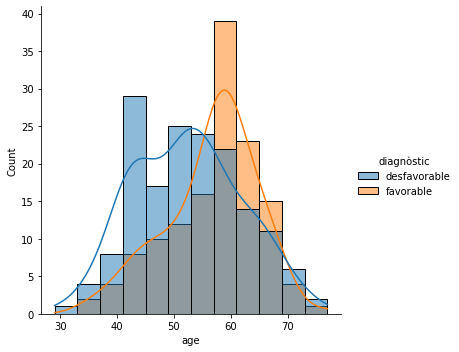

In [21]:
print('\t taula observada edat\n\n',edat_obs)
edat_esp = expected_freq(edat_obs)
edat_esp = pd.DataFrame(edat_esp)
edat_esp.index = edat_obs.index
edat_esp.columns = edat_obs.columns
print('\n\n\t taula esperada edat\n\n',edat_esp)
test = chisquare(edat_obs,axis=None)
print(F'\nEl valor del estadístic de contrast chi-quadrat és {round(test.statistic,2)}')
print(F'\nEl p-valor és {round(test.pvalue,14)}')
sns.displot(data=malcor,kde=True, x='age', hue='diagnòstic')
plt.show()

Es veu clar que l'edat afecta a la possibiliatat de patir atac de cor fins als 55-60 anys. Aquesta no de la manera que esperavem, ja que sembla que conforma augmenta l'edat la proporció de favorables augmenta. A les conclusions analitzarem a que pot ser degut aquest fet, que parteix de la naturalesa de les dades i factors de supervivència. Mirem ara el sexe.

	 taula observada sexe

 sexe          dona  home
diagnòstic              
desfavorable    72    93
favorable       24   114


	 taula esperada sexe

 sexe               dona        home
diagnòstic                         
desfavorable  52.277228  112.722772
favorable     43.722772   94.277228

El valor del estadisic de contrast es 58.78

El p-valor és 1.07e-12


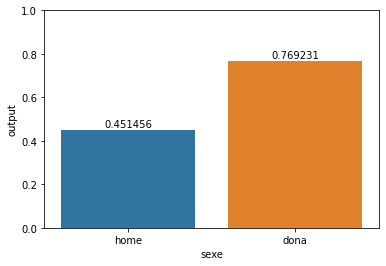

In [22]:
print('\t taula observada sexe\n\n',sexe_obs)
sexe_esp = expected_freq(sexe_obs)
sexe_esp = pd.DataFrame(sexe_esp)
sexe_esp.index = sexe_obs.index
sexe_esp.columns = sexe_obs.columns
print('\n\n\t taula esperada sexe\n\n',sexe_esp)
test = chisquare(sexe_obs,axis=None)
print(F'\nEl valor del estadisic de contrast es {round(test.statistic,2)}')
print(F'\nEl p-valor és {round(test.pvalue,14)}')
fig, ax = plt.subplots()
sns.barplot(data=malcor, x='sexe', y='output', estimator=np.mean, ci=None, ax=ax)
ax.bar_label(ax.containers[0])
ax.set_ylim((0, 1))
plt.show()

El sexe afecta a la possibilitat de patir un atac de cor, ens surt un p-valor molt significatiu per rebutjar l'hipotesis d'independència. Pel gràfic es veu que els homes tenen una proporció de casos desfavorables del 45% en canvi les dones del 77% aproximadament. Això no vol dir que les dones siguin més propenses a patir atacs de cor, sinó que les que van al hospital perquè els hi mirin el cor, solen tenir molts números de patir-ne). El fet que el dataset contingui molts més homes també és per la naturalesa de les dades, fet que explicarem a les conclusions.

Mirem ara els contrastos per si podem acceptar la normalitat i homocedasticitat del colesterol per la variable sexe i l'edat per realitzar una ANOVA de comparació de mitjanes amb el sexe i l'edat pel colesterol. No podem saber si la mostra que tenim prove d'una mostra més gran i per tant aquesta ha estat escollida de forma aleatoria per assegurar la independèndia de mostres, suposarem que si. Agafar una mostra aleatoria ens faria treballar amb un dataset encara més petit.

In [23]:
# Test de normalitat Shapiro-Wilk
pg.normality(data=malcor, dv='chol', group='sexe')

,W,pval,normal
sexe,,,
home,0.993395,0.489818,True
dona,0.989142,0.660649,True


No podem rebutjar la hipoesis nul·la per tant acceptem que les dades provenen d'una distribució normal en tots els grups.

In [24]:
# Test de homocedasticitat bartlett
pg.homoscedasticity(data=malcor, dv='chol', group='sexe', method='bartlett')

,T,pval,equal_var
bartlett,4.224527,0.039844,False


Amb molt poca significància rebutjem la hipòtesis de que les variancies del colesterol per sexe tenen la mateixa variança, tindriem que fer una ANOVA amb la correcció de Welth, en tot cas com que estem tan aprop del nivell de significancia del 5% pensarem que si hi ha homocedasticitat. Podriem fer un t-tes al tenir només dos grups, però així l'esquema ens serveix per l'edat.

In [25]:
# Test ANOVA d'una via
pg.anova(data=malcor, dv='chol', between='sexe')

,Source,ddof1,ddof2,F,p-unc,np2
0,sexe,1,295,5.691361,0.01768,0.018928


Rebutjem la hipotesis nula que la mitjana del colesterol per sexe és igual. Mirem ara el cas de la variable objectiu per sexe.

In [26]:
# Test de normalitat Shapiro-Wilk
pg.normality(data=malcor, dv='chol', group='edat')

,W,pval,normal
edat,,,
vell,0.990201,0.831055,True
jove,0.966446,0.078922,True
adult,0.992110,0.542004,True


No podem rebutjar la hipòtesis nul·la, per tant acceptem que les dades provenen d'una distribució normal en tots els grups.

In [27]:
# Test de homocedasticitat bartlett
pg.homoscedasticity(data=malcor, dv='chol', group='edat', method='bartlett')

,T,pval,equal_var
bartlett,0.710066,0.70115,True


In [28]:
# Test ANOVA d'una via
pg.anova(data=malcor, dv='chol', between='edat')

,Source,ddof1,ddof2,F,p-unc,np2
0,edat,2,294,4.429133,0.012731,0.029249


Podem afirmar que almenys entre dos grups les diferències entre les mitjanes del colesterol son significatives, realitzem ara una ANOVA de dos vies combinant els efectes de l'edat i el sexe en el colesterol. Suposem que es compleixen els supòsits per aplicar la prova, sabem que l'ideal és que els grups tinguèssin el mateix número d'individus (model equilibrat)

In [29]:
# Test ANOVA de dos vies
pg.anova(data=malcor, dv='chol', between=['sexe','edat'])

,Source,SS,DF,MS,F,p-unc,np2
0,sexe,9802.528349,1.0,9802.528349,4.850346,0.028425,0.016395
1,edat,16233.872355,2.0,8116.936178,4.016305,0.019027,0.026862
2,sexe * edat,6976.274801,2.0,3488.137400,1.725950,0.179821,0.011723
3,Residual,588109.796939,291.0,2020.995866,NaN,NaN,NaN


Observem el que ja sabíem, hi ha diferencies significatives entre el colesterol per sexe i edat, tot i així no es detecta una interacció significativa entre ells.

## 4.3 Aplicació de proves estadístiques per comparar els grups de dades.

Volem mirar si les variables que defineixen la possibilitat d'atac de cor varien entre homes i dones. És conegut en el món de la medicina que els simptomes per els atacs de cor varien molt entre homes i dones i ens interessa comprobar si les dades reflexen el mateix. Per això, crearem models de arbres de decisió per sexe i veurem si les varaibles que prediuen els atacs de cor són les mateixes.

El primer que farem és veure com funcionaria un model mixt, és a dir, tractant per igual homes i dones. Separem el nostre dataset en train i test (2/3 i 1/3 de les dades) i entrenem un arbre de classificació.

In [30]:
malcor_2 = pd.get_dummies(malcor)

x = malcor_2.loc[:, malcor_2.columns != "output"]
x = x.loc[:, x.columns!="diagnòstic_favorable"]
x = x.loc[:, x.columns!="diagnòstic_desfavorable"]

y = malcor_2["output"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

mod = DecisionTreeClassifier().fit(x_train, y_train)

A continuació, veiem quina forma té l'arbre. Plotejem les fulles i també en format text perquè sigui més entenedor.

Text(0.5, 1.0, 'Arbre de decissió')

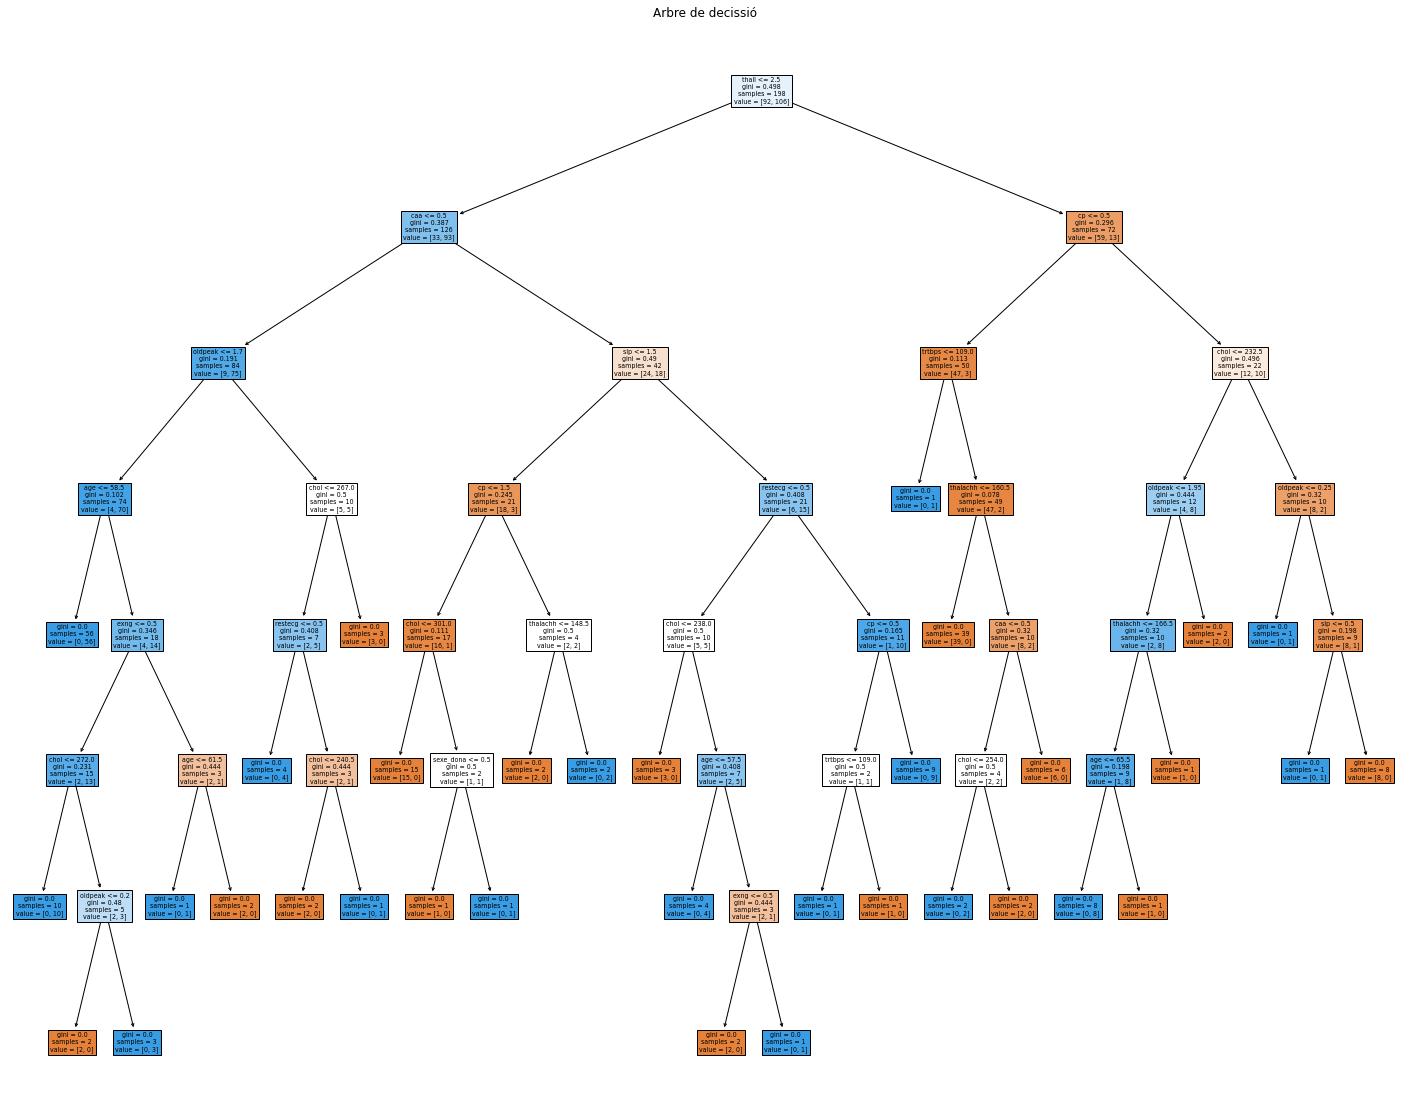

In [31]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(mod, filled=True, feature_names=x_train.columns)
plt.title("Arbre de decissió")

In [32]:
r = export_text(mod, feature_names=x_train.columns.tolist())
print(r)

|--- thall <= 2.50
|   |--- caa <= 0.50
|   |   |--- oldpeak <= 1.70
|   |   |   |--- age <= 58.50
|   |   |   |   |--- class: 1
|   |   |   |--- age >  58.50
|   |   |   |   |--- exng <= 0.50
|   |   |   |   |   |--- chol <= 272.00
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- chol >  272.00
|   |   |   |   |   |   |--- oldpeak <= 0.20
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- oldpeak >  0.20
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- exng >  0.50
|   |   |   |   |   |--- age <= 61.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- age >  61.50
|   |   |   |   |   |   |--- class: 0
|   |   |--- oldpeak >  1.70
|   |   |   |--- chol <= 267.00
|   |   |   |   |--- restecg <= 0.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- restecg >  0.50
|   |   |   |   |   |--- chol <= 240.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- chol >  240.50
|   |   |   |   |   |   |--- class: 1
|   

A continuació, anem a veure quina precissió té aquest model. Calculem la matriu de confusió i la precisió del model utilitzant el conjunt de test.

In [33]:
y_pred = mod.predict(x_test)

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[29 13]
 [14 43]]
0.7272727272727273


Obtenim una precissió en les prediccions d'un 73%, que no està malament tenint en compte que hi ha poques dades.

A continuació, anem a generar dos models diferents per homes i per dones. Primer separem el dataset per sexe.

In [34]:
homes = malcor[malcor['sex'] == 1]
dones = malcor[malcor['sex'] == 0]

homes = pd.get_dummies(homes)
dones = pd.get_dummies(dones)

Després, fem el mateix que amb el model mix, entrenem un arbre de decisió per cada un dels datasets.

In [35]:
#========================== HOMES
homes_x = homes.loc[:, homes.columns != "output"]
homes_x = homes_x.loc[:, homes_x.columns!="diagnòstic_favorable"]
homes_x = homes_x.loc[:, homes_x.columns!="diagnòstic_desfavorable"]

homes_y = homes["output"]

x_homes_train, x_homes_test, y_homes_train, y_homes_test = train_test_split(homes_x, homes_y, test_size=0.33, random_state=42)

mod_homes = DecisionTreeClassifier().fit(x_homes_train, y_homes_train)

#========================== DONES 
dones_x = dones.loc[:, dones.columns != "output"]
dones_x = dones_x.loc[:, dones_x.columns!="diagnòstic_favorable"]
dones_x = dones_x.loc[:, dones_x.columns!="diagnòstic_desfavorable"]

dones_y = dones["output"]
x_dones_train, x_dones_test, y_dones_train, y_dones_test = train_test_split(dones_x, dones_y, test_size=0.33, random_state=42)

mod_dones = DecisionTreeClassifier().fit(x_dones_train, y_dones_train)

Text(0.5, 1.0, 'Arbre de decissió per dones')

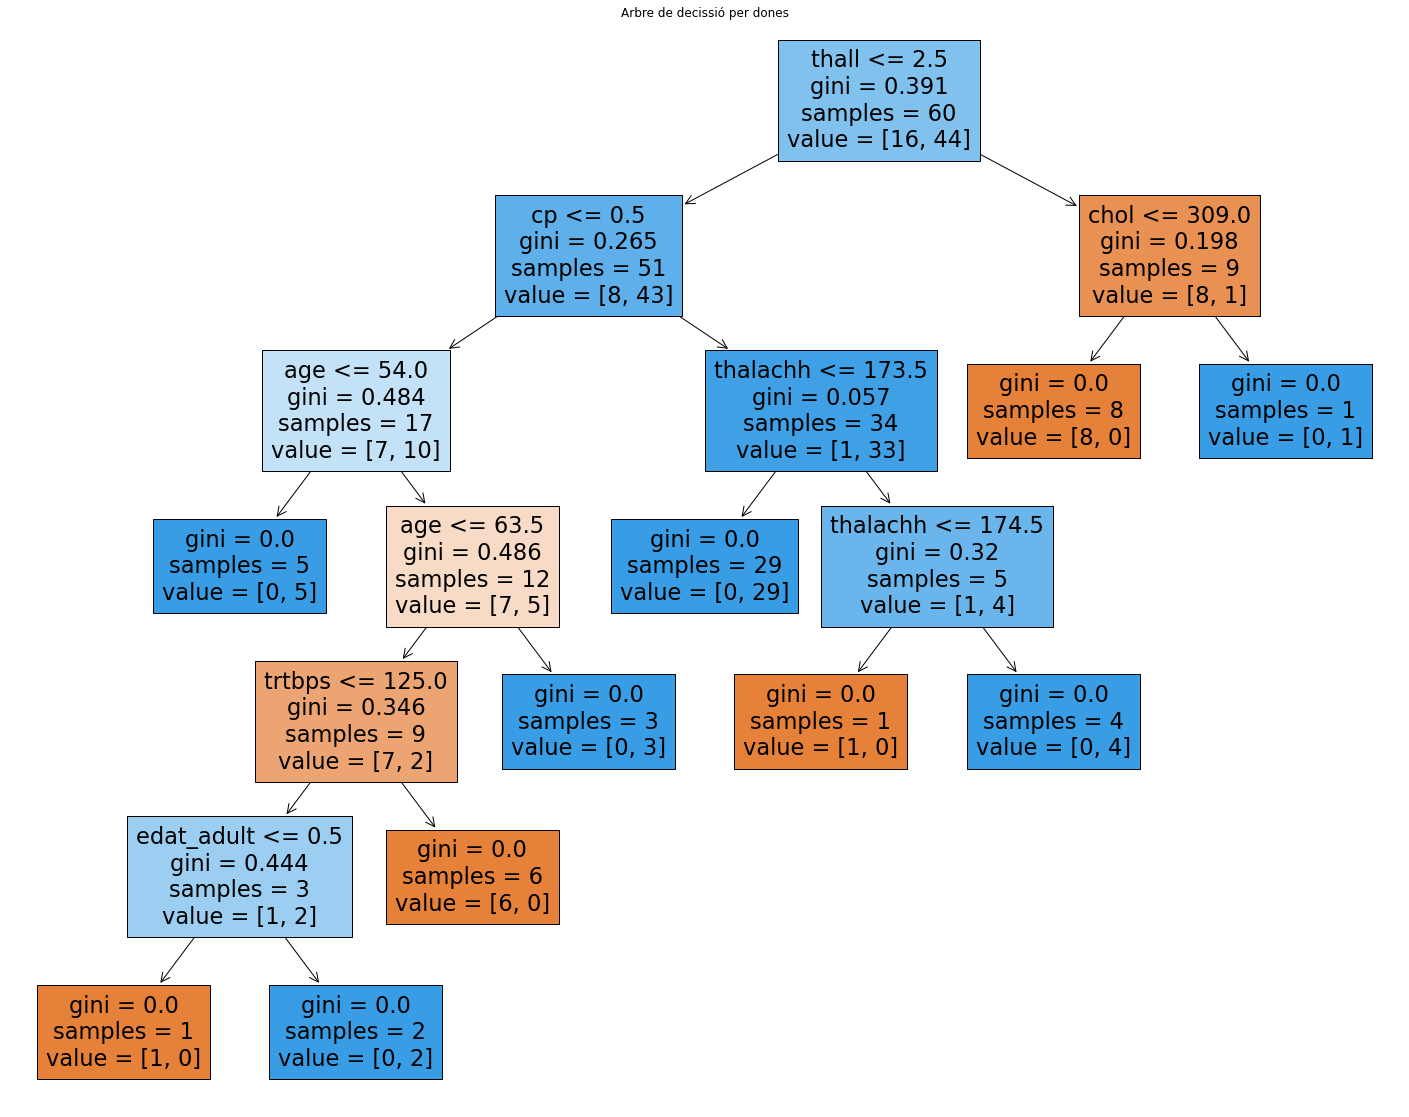

In [36]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(mod_dones, filled=True, feature_names=x_dones_train.columns)
plt.title("Arbre de decissió per dones")

Text(0.5, 1.0, 'Arbre de decissió per homes')

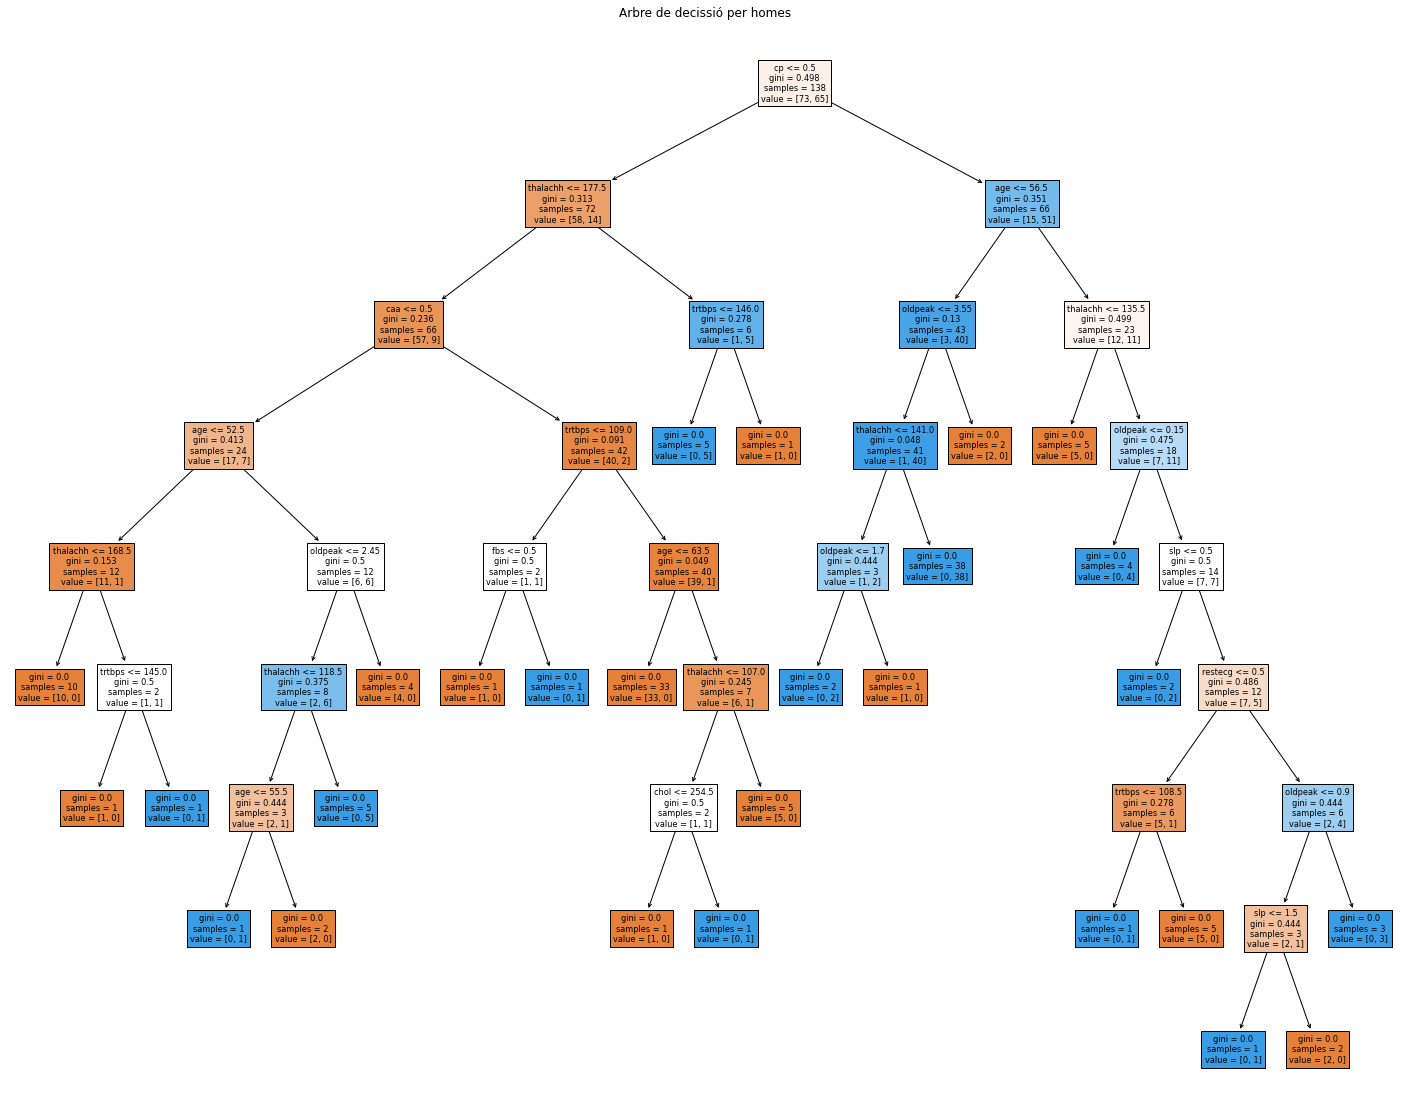

In [37]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(mod_homes, filled=True, feature_names=x_homes_train.columns)
plt.title("Arbre de decissió per homes")

A simple vista podem veure que els arbres de decisió són molt diferents entre homes i dones, i que en el cas de les dones és molt més directe la predicció. En els homes, en canvi, més variables tenen pesos diferents en el model.

In [38]:
y_homes_pred = mod_homes.predict(x_homes_test)
y_dones_pred = mod_dones.predict(x_dones_test)

print(confusion_matrix(y_homes_test, y_homes_pred))
print(confusion_matrix(y_dones_test, y_dones_pred))

print('Accuracy homes: ', accuracy_score(y_homes_test, y_homes_pred))
print('Accuracy dones: ',accuracy_score(y_dones_test, y_dones_pred))

[[31  9]
 [ 7 21]]
[[ 3  2]
 [ 4 22]]
Accuracy homes:  0.7647058823529411
Accuracy dones:  0.8064516129032258


Podem veure que al fer dos models separats, la accuracy dels dos supera la del model mixt. En aquest cas és perquè els simptomes varien molt entre sexe per questions genètiques i per tant, s'han de modelitzar diferent.

# 5. Conclusions

- Ens ha sorpres que el risc de patir un atac de cor disminúis amb l'edat un cop arribat a cert pic. Hem buscat informació de probabilitat de supervivència dels atacs de cor i aquesta sol estar entre el 10% i el 30%. Segurament si aquesta fos propera al 100% les possibilitats de patir un atac de cor en edats més grans sería més elevada, ja que els que el van patir al principi seguirien vius.

- També ens ha sorprès que en el cas de les dones hi hagi molts casos desfavorables. Això no vol dir que les dones tinguin més possibilitats de patir un atac de cor, ja que són dades recollides en un hospital i no és una mostra poblacional genèrica. El que ens indica és que quan les dones van al hospital, ja tenen símptomes (i números) de patirne un, mentre que en els homes se'ls revisa amb menys indicis de patir-ne.

- La relació que tenen les variables per predir la variable objectiu varien mo

# 6.Contribucions

|     **Contribucions**     | **Signatura** |
|:-------------------------:|:-------------:|
| Investigació prèvia       | Aina i Lluis  |
| Redacció de les respostes | Aina i Lluis  |
| Desenvolupament del codi  | Aina i Lluis  |
| Participació al vídeo     | Aina i Lluis  |